<a href="https://colab.research.google.com/github/dipucriodigital/ciencia-de-dados-e-analytics/blob/main/machine-learning/ML_Aula3b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning - Prof. Tatiana Escovedo
## Aula 03: Recursos Avançados Aplicados ao Aprendizado Supervisionado 

### Prática 4

## Configuração do ambiente

In [7]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Carga do Dataset

O dataset contém informações sobre vários pacientes, com cada registro representando uma pessoa. As variáveis incluem características médicas, medidas de saúde e a presença ou ausência de diabetes. A última coluna, Outcome, indica se a paciente tem diabetes (1) ou não (0).

Descrição de Cada Coluna
- Pregnancies: Número de vezes que a paciente esteve grávida.
- Glucose: Nível de glicose no sangue em jejum (mg/dL).
- BloodPressure: Pressão arterial diastólica (mm Hg).
- SkinThickness: Espessura da dobra cutânea do tríceps (mm).
- Insulin: Nível de insulina no soro em duas horas (mu U/mL).
- BMI: Índice de Massa Corporal (peso em kg/(altura em m)^2).
- DiabetesPedigreeFunction: Função de pedigree de diabetes (mede a probabilidade de diabetes com base no histórico familiar).
- Age: Idade da paciente (anos).
- Outcome: Resultado (0 ou 1) indicando a ausência (0) ou presença (1) de diabetes.

O objetivo é prever se um paciente tem diabetes ou não baseado em suas características médicas.	

In [8]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/tatianaesc/datascience/main/diabetes.csv"

# Lê o arquivo 
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Separação em conjunto de treino e conjunto de teste com holdout

In [9]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:8]
y = array[:,8]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

LR: 0.762427 (0.057485)
KNN: 0.711978 (0.058934)
CART: 0.702010 (0.063448)
NB: 0.746060 (0.051145)
SVM: 0.749418 (0.040958)
Bagging: 0.760814 (0.046503)
RF: 0.772263 (0.048493)
ET: 0.756002 (0.066055)
Ada: 0.749418 (0.052763)
GB: 0.752618 (0.054653)
Voting: 0.762507 (0.061246)


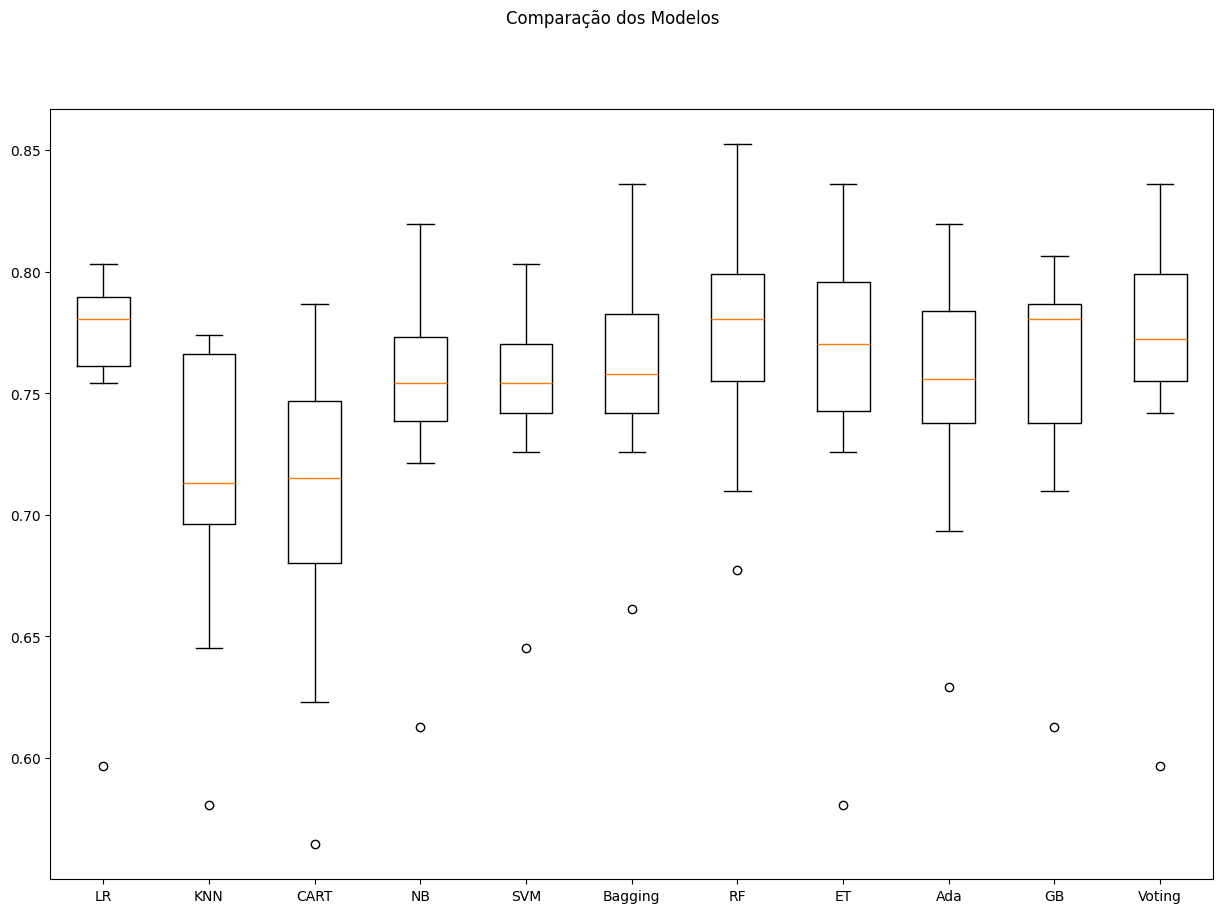

In [10]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200))) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos (treinamento)
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10)) 
fig.suptitle('Comparação dos Modelos') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

Trabalhando com dados pontencialmente desbalanceados ou sensíveis a escala

StandardScaler (padronização do conjunto de dados) e MinMaxScaler (normalização do conjunto de dados) são duas técnicas de normalização/escala usadas em machine learning para pré-processamento de dados e são úteis para preparar dados para algoritmos de aprendizado de máquina que são sensíveis à escala dos dados.

##### StandardScaler
StandardScaler padroniza os dados, ou seja, remove a média e escala os dados para que tenham uma variância unitária. Ele transforma os dados para que a média de cada feature seja 0 e a variância seja 1.

Fórmula: $z_i=\frac{x_i-\mu}{\sigma}$

 
onde:
- $x_i$ é o valor original do $i$-ésimo termo da feature.
- $\mu$ é a média dos valores da feature.
- $\sigma$ é o desvio padrão dos valores da feature.
𝑥
x é o valor original da feature.
𝜇
μ é a média dos valores da feature.
𝜎
σ é o desvio padrão dos valores da feature.


##### MinMaxScaler
MinMaxScaler escala e transforma os dados para um intervalo específico, geralmente entre 0 e 1. Ele transforma os dados para que o menor valor de uma feature seja 0 e o maior valor seja 1.

Fórmula: $z_i=\frac{x_i-min(x)}{max(x)-min(x)}$

onde:
- $x_i$ é o valor original do $i$-ésimo termo da feature.
- $min(x)$ é o menor valor da feature.
- $max(x)$ é o maior valor da feature.

Nós vamos aplicar essas técnicas para os dados do dataset de diabetes através da construção de pipelines. Pipelines são uma maneira de simplificar o processo de construção de modelos, permitindo que você execute várias etapas de pré-processamento e modelagem em sequência.

LR-orig: 0.762 (0.057)
KNN-orig: 0.712 (0.059)
CART-orig: 0.702 (0.063)
NB-orig: 0.746 (0.051)
SVM-orig: 0.749 (0.041)
Bag-orig: 0.761 (0.047)
RF-orig: 0.772 (0.048)
ET-orig: 0.756 (0.066)
Ada-orig: 0.749 (0.053)
GB-orig: 0.753 (0.055)
Vot-orig: 0.763 (0.061)


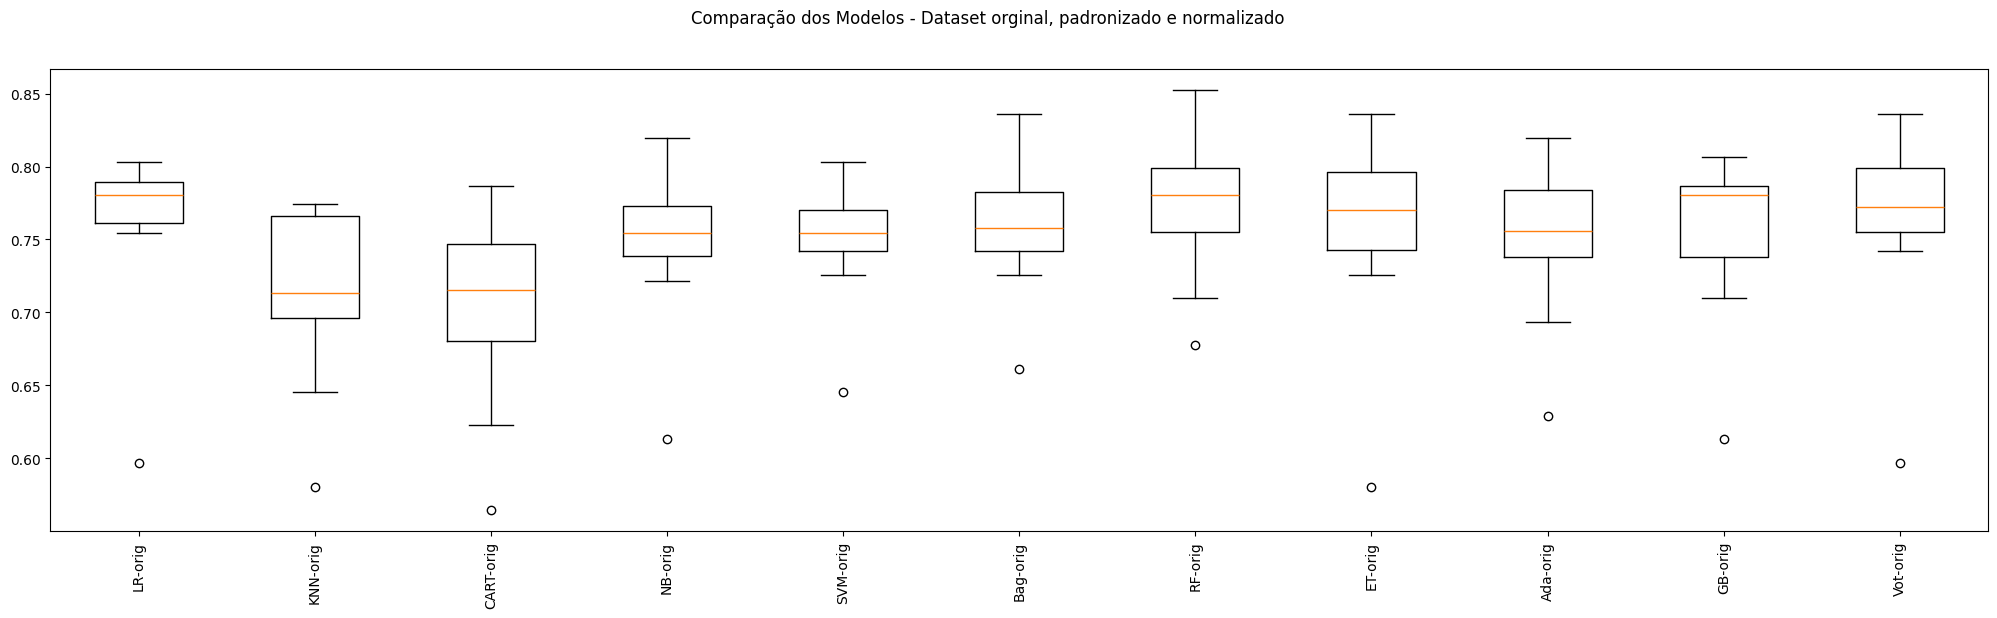

In [12]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines
# A ordem de execução é da esquerda para a direita.

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log]))) 
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
# pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log]))) 
# pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
# pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
# pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
# pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
# pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging]))) 
# pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
# pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
# pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
# pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
# pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# # Dataset Normalizado
# pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log]))) 
# pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
# pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
# pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
# pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
# pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging]))) 
# pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
# pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
# pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
# pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
# pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

A otimização de hiperparâmetros é o processo de encontrar os valores ideais para os hiperparâmetros de um modelo de machine learning. O objetivo é encontrar a combinação de hiperparâmetros que resulta no melhor desempenho do modelo.


##### Grid Search (*força bruta*)

Como Funciona o Grid Search?
1. Definição do Espaço de Hiperparâmetros: Primeiro, define-se um conjunto de valores possíveis para cada hiperparâmetro.
2. Avaliação das Combinações: Em seguida, cada combinação possível desses valores é avaliada.
3. Seleção do Melhor Conjunto: A combinação de hiperparâmetros que produz o melhor desempenho é selecionada.

In [13]:
np.random.seed(7)  # Definindo uma semente global para este bloco

# Lista de modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200))) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(estimators=bases, voting='hard')))

# Definindo os componentes do pipeline
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Lista de pipelines
pipelines = []

# Criando pipelines para cada modelo
for name, model in models:
    pipelines.append((name + '-orig', Pipeline(steps=[(name, model)])))
    pipelines.append((name + '-padr', Pipeline(steps=[standard_scaler, (name, model)])))
    pipelines.append((name + '-norm', Pipeline(steps=[min_max_scaler, (name, model)])))

# Definindo os parâmetros para GridSearchCV
param_grids = {
    'LR': {
        'LR__C': [0.01, 0.1, 1, 10, 100],
        'LR__solver': ['liblinear', 'saga']
    },
    'KNN': {
        'KNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
        'KNN__metric': ["euclidean", "manhattan", "minkowski"]
    },
    'CART': {
        'CART__max_depth': [None, 10, 20, 30, 40, 50],
        'CART__min_samples_split': [2, 5, 10],
        'CART__min_samples_leaf': [1, 2, 4]
    },
    'NB': {
        'NB__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    },
    'SVM': {
        'SVM__C': [0.1, 1, 10, 100],
        'SVM__gamma': [1, 0.1, 0.01, 0.001],
        'SVM__kernel': ['rbf', 'linear']
    },
    'RF': {
        'RF__n_estimators': [10, 50, 100, 200],
        'RF__max_features': ['auto', 'sqrt', 'log2'],
        'RF__max_depth': [None, 10, 20, 30],
        'RF__min_samples_split': [2, 5, 10],
        'RF__min_samples_leaf': [1, 2, 4]
    },
    'ET': {
        'ET__n_estimators': [10, 50, 100, 200],
        'ET__max_features': ['auto', 'sqrt', 'log2'],
        'ET__max_depth': [None, 10, 20, 30],
        'ET__min_samples_split': [2, 5, 10],
        'ET__min_samples_leaf': [1, 2, 4]
    },
    'Ada': {
        'Ada__n_estimators': [10, 50, 100, 200],
        'Ada__learning_rate': [0.01, 0.1, 1, 10]
    },
    'GB': {
        'GB__n_estimators': [10, 50, 100, 200],
        'GB__learning_rate': [0.01, 0.1, 0.2, 0.3],
        'GB__max_depth': [3, 5, 7, 9]
    },
    'Voting': {
        # Para VotingClassifier, geralmente não há hiperparâmetros para ajustar diretamente
        # Ajustar os hiperparâmetros dos estimadores base individualmente se necessário
    }
}

# Parâmetros de cross-validation e scoring
scoring = 'accuracy'
kfold = 5

# Executando o GridSearchCV para cada pipeline
for name, pipeline in pipelines:
    model_type = name.split('-')[0]
    if model_type in param_grids:
        param_grid = param_grids[model_type]
    else:
        param_grid = {}  # Para modelos que não têm parâmetros definidos

    grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # Imprimindo a melhor configuração
    print("Modelo: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))
    
#It took 53min


Modelo: LR-orig - Melhor: 0.768613 usando {'LR__C': 100, 'LR__solver': 'liblinear'}
Modelo: LR-padr - Melhor: 0.770239 usando {'LR__C': 1, 'LR__solver': 'liblinear'}
Modelo: LR-norm - Melhor: 0.768613 usando {'LR__C': 100, 'LR__solver': 'liblinear'}
Modelo: KNN-orig - Melhor: 0.758843 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 13}
Modelo: KNN-padr - Melhor: 0.752406 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 19}
Modelo: KNN-norm - Melhor: 0.752406 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 19}
Modelo: CART-orig - Melhor: 0.713275 usando {'CART__max_depth': 10, 'CART__min_samples_leaf': 2, 'CART__min_samples_split': 5}
Modelo: CART-padr - Melhor: 0.711649 usando {'CART__max_depth': 40, 'CART__min_samples_leaf': 2, 'CART__min_samples_split': 2}
Modelo: CART-norm - Melhor: 0.711715 usando {'CART__max_depth': 40, 'CART__min_samples_leaf': 4, 'CART__min_samples_split': 2}
Modelo: NB-orig - Melhor: 0.749114 usando {'NB__var_smoothing': 1e-08}
Modelo: NB

In [ ]:
# Modelo: LR-orig - Melhor: 0.766987 usando {'LR__C': 100, 'LR__solver': 'liblinear'}
# Modelo: LR-padr - Melhor: 0.770239 usando {'LR__C': 1, 'LR__solver': 'liblinear'}
# Modelo: LR-norm - Melhor: 0.768613 usando {'LR__C': 100, 'LR__solver': 'liblinear'}
# Modelo: KNN-orig - Melhor: 0.758843 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 13}
# Modelo: KNN-padr - Melhor: 0.752406 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 19}
# Modelo: KNN-norm - Melhor: 0.752406 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 19}
# Modelo: CART-orig - Melhor: 0.713275 usando {'CART__max_depth': 10, 'CART__min_samples_leaf': 2, 'CART__min_samples_split': 5}
# Modelo: CART-padr - Melhor: 0.711649 usando {'CART__max_depth': 40, 'CART__min_samples_leaf': 2, 'CART__min_samples_split': 2}
# Modelo: CART-norm - Melhor: 0.711715 usando {'CART__max_depth': 40, 'CART__min_samples_leaf': 4, 'CART__min_samples_split': 2}
# Modelo: NB-orig - Melhor: 0.749114 usando {'NB__var_smoothing': 1e-08}
# Modelo: NB-padr - Melhor: 0.747488 usando {'NB__var_smoothing': 1e-09}
# Modelo: NB-norm - Melhor: 0.747488 usando {'NB__var_smoothing': 1e-09}
# Modelo: SVM-orig - Melhor: 0.768653 usando {'SVM__C': 100, 'SVM__gamma': 1, 'SVM__kernel': 'linear'}
# Modelo: SVM-padr - Melhor: 0.770279 usando {'SVM__C': 10, 'SVM__gamma': 0.01, 'SVM__kernel': 'rbf'}
# Modelo: SVM-norm - Melhor: 0.775157 usando {'SVM__C': 100, 'SVM__gamma': 0.1, 'SVM__kernel': 'rbf'}
# Modelo: Bagging-orig - Melhor: 0.757270 usando {}
# Modelo: Bagging-padr - Melhor: 0.760549 usando {}
# Modelo: Bagging-norm - Melhor: 0.755618 usando {}
# Modelo: RF-orig - Melhor: 0.776796 usando {'RF__max_depth': 30, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 2, 'RF__min_samples_split': 5, 'RF__n_estimators': 200}
# Modelo: RF-padr - Melhor: 0.776823 usando {'RF__max_depth': None, 'RF__max_features': 'log2', 'RF__min_samples_leaf': 4, 'RF__min_samples_split': 10, 'RF__n_estimators': 50}
# Modelo: RF-norm - Melhor: 0.783287 usando {'RF__max_depth': 10, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2, 'RF__n_estimators': 50}
# Modelo: ET-orig - Melhor: 0.781714 usando {'ET__max_depth': 10, 'ET__max_features': 'sqrt', 'ET__min_samples_leaf': 1, 'ET__min_samples_split': 5, 'ET__n_estimators': 50}
# Modelo: ET-padr - Melhor: 0.776863 usando {'ET__max_depth': 10, 'ET__max_features': 'log2', 'ET__min_samples_leaf': 2, 'ET__min_samples_split': 5, 'ET__n_estimators': 100}
# Modelo: ET-norm - Melhor: 0.776836 usando {'ET__max_depth': 30, 'ET__max_features': 'log2', 'ET__min_samples_leaf': 4, 'ET__min_samples_split': 10, 'ET__n_estimators': 100}
# Modelo: Ada-orig - Melhor: 0.765414 usando {'Ada__learning_rate': 0.1, 'Ada__n_estimators': 100}
# Modelo: Ada-padr - Melhor: 0.765414 usando {'Ada__learning_rate': 0.1, 'Ada__n_estimators': 100}
# Modelo: Ada-norm - Melhor: 0.765414 usando {'Ada__learning_rate': 0.1, 'Ada__n_estimators': 100}
# Modelo: GB-orig - Melhor: 0.762188 usando {'GB__learning_rate': 0.2, 'GB__max_depth': 7, 'GB__n_estimators': 100}
# Modelo: GB-padr - Melhor: 0.763774 usando {'GB__learning_rate': 0.1, 'GB__max_depth': 5, 'GB__n_estimators': 200}
# Modelo: GB-norm - Melhor: 0.767067 usando {'GB__learning_rate': 0.3, 'GB__max_depth': 9, 'GB__n_estimators': 100}
# Modelo: Voting-orig - Melhor: 0.758896 usando {}
# Modelo: Voting-padr - Melhor: 0.757217 usando {}
# Modelo: Voting-norm - Melhor: 0.755631 usando {}

In [3]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:    
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_)) 

NameError: name 'np' is not defined

## Finalização do Modelo

In [1]:
# Avaliação do modelo com o conjunto de testes
# Melhor modelo
# RF-norm - Melhor: 0.783287 usando {'RF__max_depth': 10, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2, 'RF__n_estimators': 50}

np.random.seed(7)

# Preparação do modelo
scaler = MinMaxScaler().fit(X_train)
rescaledX = scaler.transform(X_train) # aplicação da normalização no conjunto de treino
model = RandomForestClassifier(n_estimators=50, 
                               max_features='sqrt',
                               min_samples_split=2,
                               max_depth=10,
                               min_samples_leaf=1)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da normalização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

NameError: name 'np' is not defined

Rodando o modelo a partir de um pipeline com os hiperparâmetros otimizados.

In [9]:
np.random.seed(7)

model = RandomForestClassifier(n_estimators=50, 
                               max_features='sqrt',
                               min_samples_split=2,
                               max_depth=10,
                               min_samples_leaf=1)

pipeline = Pipeline(steps=[('MinMaxScaler', MinMaxScaler()), ('RF', model)])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
print(accuracy_score(y_test, predictions))

0.7922077922077922


## Salvando os arquivos

In [24]:
# Salvando o modelo
model_filename = 'rf_diabetes_classifier.pkl'
with open("../models/"+model_filename, 'wb') as file:
    pickle.dump(model, file)

# Salvando o scaler
scaler_filename = 'minmax_scaler_diabetes.pkl'
with open("../scalers/"+scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)
    
# Salvando o pipeline
pipeline_filename = 'rf_diabetes_pipeline.pkl'
with open("../pipelines/"+pipeline_filename, 'wb') as file:
    pickle.dump(pipeline, file)
    
# Salvando X_test e y_test
X_test_df = pd.DataFrame(X_test, columns=dataset.columns[:-1])
y_test_df = pd.DataFrame(y_test, columns=[dataset.columns[-1]])
X_test_df.to_csv("../data/X_test_dataset_diabetes.csv", index=False)
y_test_df.to_csv("../data/y_test_dataset_diabetes.csv", index=False)


## Simulando a aplicação do modelo em dados não vistos

In [44]:
# Preparação do modelo com TODO o dataset
scaler = MinMaxScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da normalização com TODO o dataset
model.fit(rescaledX, y)

RandomForestClassifier(max_depth=10, n_estimators=50)

In [45]:
# Novos dados - não sabemos a classe!
data = {'preg':  [1, 9, 5],
        'plas': [90, 100, 110],
        'pres': [50, 60, 50],
        'skin': [30, 30, 30],
        'test': [100, 100, 100],
        'mass': [20.0, 30.0, 40.0],
        'pedi': [1.0, 2.0, 1.0],
        'age': [15, 40, 40],  
        }

atributos = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:8].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[ 0.05882353  0.45226131  0.40983607  0.3030303   0.11820331  0.29806259
   0.39368061 -0.1       ]
 [ 0.52941176  0.50251256  0.49180328  0.3030303   0.11820331  0.44709389
   0.8206661   0.31666667]
 [ 0.29411765  0.55276382  0.40983607  0.3030303   0.11820331  0.59612519
   0.39368061  0.31666667]]


In [46]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[0. 1. 1.]
